# EDA DISEASE

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv("../data/Large-data/cardio_train.csv", sep=";")

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [48]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
negative, positive = df["cardio"].value_counts()

print(f"Negative for cardiovascular disease: {negative}")
print(f"Positive for cardiovascular disease: {positive}")

Negative for cardiovascular disease: 35021
Positive for cardiovascular disease: 34979


In [50]:
df["cholesterol"].value_counts()

1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64

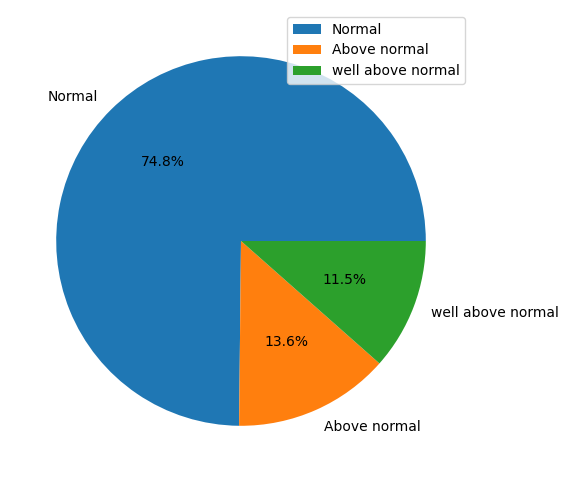

In [51]:
# Piechart for cholesterol levels
fig = plt.subplots(figsize=(10,6))
plt.pie(df["cholesterol"].value_counts(), labels=["Normal", "Above normal", "well above normal"], autopct="%1.1f%%")
plt.legend()

In [52]:
df["age"]

0        18393
1        20228
2        18857
3        17623
4        17474
         ...  
69995    19240
69996    22601
69997    19066
69998    22431
69999    20540
Name: age, Length: 70000, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

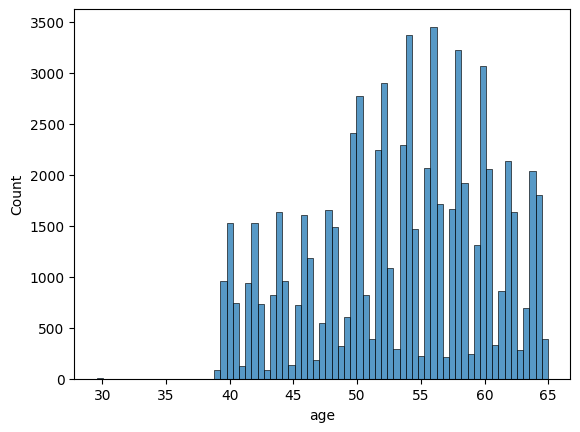

In [53]:
# histplot for age converted to display by year rather than days
sns.histplot(df["age"]/365)

In [54]:
# decided to convert age column to years entirely to make it easier to understand further on
df["age"] = df["age"]/365
df["age"]
# this does make it easier to understand the age of a person but makes it slightly less accurate as it does not account for leapyears so a decimal of .26 years might not be exact

0        50.391781
1        55.419178
2        51.663014
3        48.282192
4        47.873973
           ...    
69995    52.712329
69996    61.920548
69997    52.235616
69998    61.454795
69999    56.273973
Name: age, Length: 70000, dtype: float64

In [55]:
non_smokers, smokers = df["smoke"].value_counts()
smoker_percentage = df["smoke"].mean()

print(f"There are {non_smokers} non smokers and {smokers} smokers")
print(f"{smoker_percentage*100:.2f}% are smokers")

There are 63831 non smokers and 6169 smokers
8.81% are smokers


In [56]:
df["weight"].describe()

count    70000.000000
mean        74.205690
std         14.395757
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64

[Text(0.5, 1.0, 'Weight distribution in kg')]

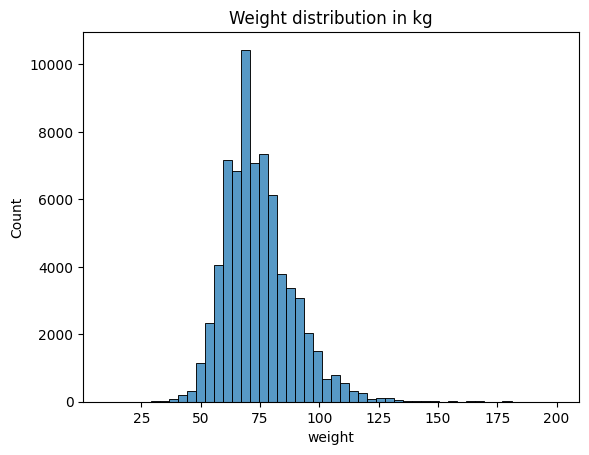

In [57]:
sns.histplot(df["weight"], bins=50).set(title="Weight distribution in kg")

In [58]:
df["height"].describe()

count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

[Text(0.5, 1.0, 'Height distribution in cm')]

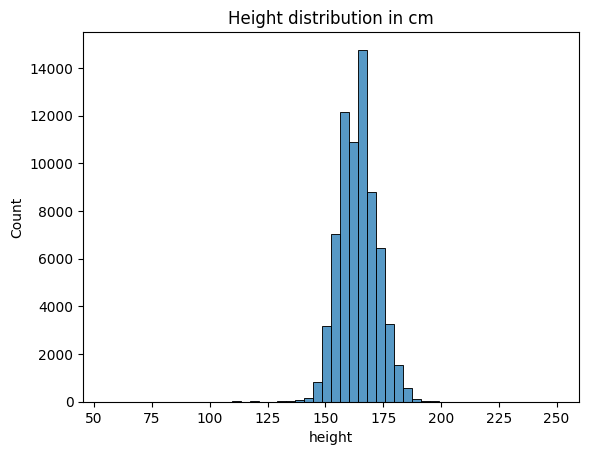

In [59]:
sns.histplot(df["height"], bins=50).set(title="Height distribution in cm")

In [60]:
df_women = df[df["gender"] == 1]
df_men = df[df["gender"] == 2]

df_women

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0
5,8,60.038356,1,151,67.0,120,80,2,2,0,0,0,0
6,9,60.583562,1,157,93.0,130,80,3,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,53.969863,1,172,70.0,130,90,1,1,0,0,1,1
69994,99992,57.736986,1,165,80.0,150,80,1,1,0,0,1,1
69996,99995,61.920548,1,158,126.0,140,90,2,2,0,0,1,1
69998,99998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1


In [61]:
df_men

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
7,12,61.873973,2,178,95.0,130,90,3,3,0,0,1,1
11,16,51.547945,2,173,60.0,120,80,1,1,0,0,1,0
12,18,40.523288,2,165,60.0,120,80,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69981,99972,47.945205,2,182,110.0,130,90,2,2,0,0,1,1
69984,99975,49.112329,2,168,80.0,120,80,1,1,0,0,1,1
69986,99978,49.857534,2,180,78.0,120,80,1,1,0,0,1,0
69995,99993,52.712329,2,168,76.0,120,80,1,1,1,0,1,0


[Text(0.5, 1.0, 'Mens cardiovascular disease %')]

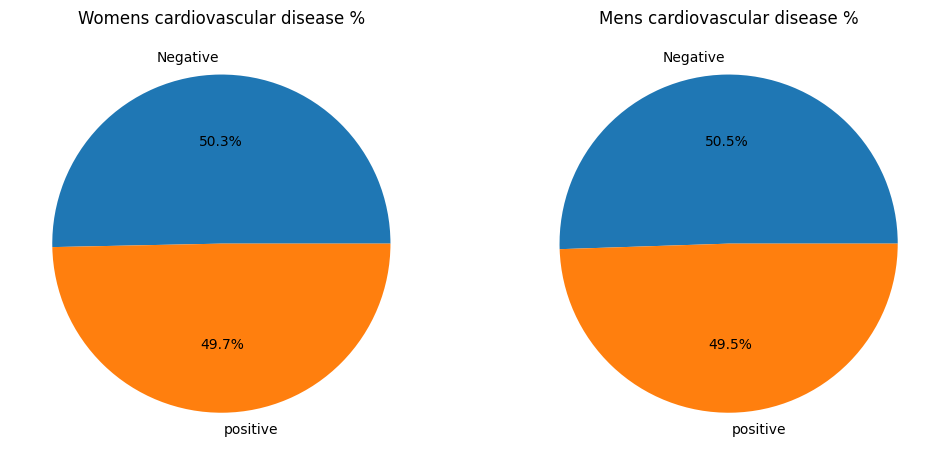

In [62]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))

ax1.pie(df_women["cardio"].value_counts(), labels=["Negative", "positive"], autopct="%1.1f%%")
ax2.pie(df_men["cardio"].value_counts(), labels=["Negative", "positive"], autopct="%1.1f%%")

ax1.set(title="Womens cardiovascular disease %")
ax2.set(title="Mens cardiovascular disease %")

## Feature engineering BMI

- based on https://en.wikipedia.org/wiki/Body_mass_index
- weight(kg)/height(m)^2

In [63]:
# makes BMI column by converting height from cm to m and then using formula kg/m^2
df["BMI"] = df["weight"]/((df["height"]/100)**2)
df["BMI"]

0        21.967120
1        34.927679
2        23.507805
3        28.710479
4        23.011177
           ...    
69995    26.927438
69996    50.472681
69997    31.353579
69998    27.099251
69999    24.913495
Name: BMI, Length: 70000, dtype: float64

In [64]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [65]:
df["BMI"].describe()

count    70000.000000
mean        27.556513
std          6.091511
min          3.471784
25%         23.875115
50%         26.374068
75%         30.222222
max        298.666667
Name: BMI, dtype: float64

In [66]:
df.query("BMI > 60")

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
224,309,59.726027,2,76,55.0,120,80,1,1,0,0,1,0,95.221607
389,552,45.802740,2,165,169.0,120,80,1,1,0,0,1,0,62.075298
2458,3470,64.783562,2,159,165.0,130,70,1,1,0,0,0,0,65.266406
3313,4672,48.068493,1,155,155.0,160,1000,1,1,0,0,1,1,64.516129
3413,4825,39.958904,1,159,159.0,100,80,1,1,0,0,1,0,62.893082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64787,92478,64.317808,1,105,80.0,130,90,1,1,0,0,1,1,72.562358
65302,93223,50.594521,1,99,60.0,90,60,1,1,0,0,1,0,61.218243
66479,94906,46.378082,2,110,90.0,110,90,1,1,0,0,1,0,74.380165
66643,95141,51.589041,1,57,61.0,130,90,1,1,0,0,1,1,187.750077


as we can see with extrem high BMI it seems to be because of error in height messurements as a height of less than a meter would be highly unusual if not impossible for an adult.


In [68]:
df.query("BMI < 14")

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
6486,9223,58.136986,1,250,86.0,140,100,3,1,0,0,1,1,13.760000
9487,13518,57.419178,2,172,40.0,140,90,1,2,0,0,1,1,13.520822
16322,23318,59.923288,1,165,35.0,100,70,1,1,0,0,1,0,12.855831
16906,24167,47.320548,2,170,31.0,150,90,2,2,0,0,1,1,10.726644
18559,26503,49.698630,1,160,30.0,120,80,1,1,0,0,1,1,11.718750
26806,38312,63.791781,1,157,23.0,110,80,1,1,0,0,1,0,9.331007
29488,42156,55.912329,2,177,22.0,120,80,1,1,1,1,1,0,7.022248
33817,48318,59.128767,2,178,11.0,130,90,1,1,0,0,1,1,3.471784
38417,54851,59.750685,1,154,32.0,110,60,1,1,0,0,1,0,13.493001
57858,82567,51.517808,2,165,10.0,180,1100,2,2,0,0,1,1,3.673095


and when it comes to extreme lows in BMI it seems most likely to depend on error in weight messurements as for example being 178(cm) tall and weighing only 11(kg) should be physically impossible

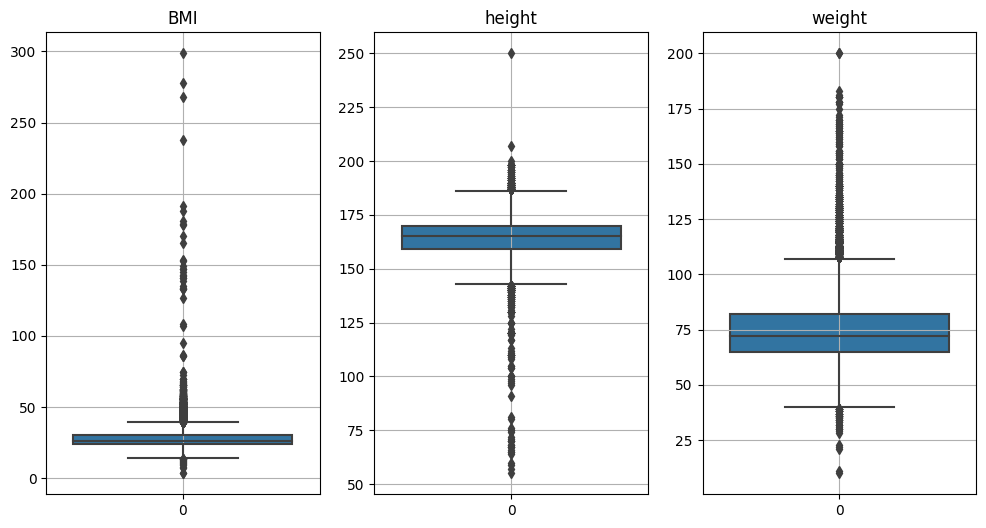

In [85]:
# boxplots to show outliers in BMI, height and weight
fig, axes = plt.subplots(1,3, figsize=(12,6))

title = ["BMI", "height", "weight"]

for i, ax in enumerate(axes):
    sns.boxplot(df[title[i]], ax=ax).set(title=title[i])
    ax.grid()

Here we can see the varius outliers. For BMI it is primarily to high, for height its mostly too low and for weight too high. Because of the calculation for BMI low height and high weight would give high BMI. Note that not all of the outliers indicate a false mesurement as it is very possible for a few people to be around 2m in the dataset.

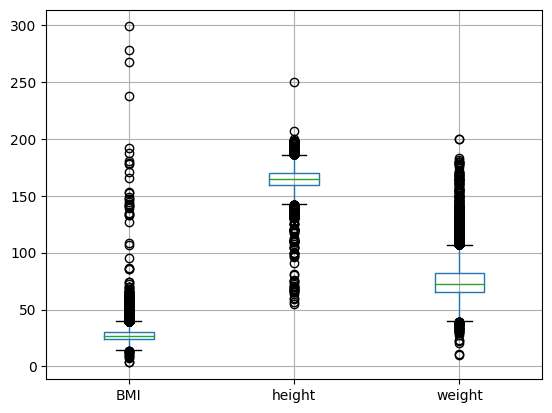

In [117]:
# Using pandas boxplot to get the values from the boxplots
box_data = df.boxplot(column=title, return_type="dict")

# contains all outlier points
outliers = [flier.get_ydata() for flier in box_data["fliers"]]
# contains the box range
boxes = [box.get_ydata() for box in box_data["boxes"]]
# contains the whiskers range
whiskers = [whiskers.get_ydata() for whiskers in box_data["whiskers"]]

In [131]:
# upper - lower whisker range
print(f"BMI whiskers{whiskers[0:2]}")
print(f"height whiskers{whiskers[2:4]}")
print(f"weight whiskers{whiskers[4:]}")

BMI whiskers[array([23.87511478, 14.47950008]), array([30.22222222, 39.73612129])]
height whiskers[array([159., 143.]), array([170., 186.])]
weight whiskers[array([65., 40.]), array([ 82., 107.])]


In [132]:
# range of the boxes
print(f"BMI box range{boxes[0][-2:]}")
print(f"Height box range{boxes[1][-2:]}")
print(f"weight box range{boxes[2][-2:]}")

BMI box range[30.22222222 23.87511478]
Height box range[170. 159.]
weight box range[82. 65.]


In [120]:
# gets the lowest and highest limits for the boxplot whiskers
lowest, highest = whiskers[0][1], whiskers[1][1]
lowest, highest

(14.479500076207893, 39.73612129161683)

| BMI Category | BMI Range   |
|--------------|-------------|
| Severe underweight       | < 15.0      |
| Moderate underweight     | 15.0 - 15.9 |
| Mild underweight         | 16.0 - 18.4 |
| Underweight  | < 18.5      |
| Normal weight| 18.5 - 24.9 |
| Overweight   | 25 - 29.9   |
| Obesity class I | 30 - 34.9 |
| Obesity class II | 35 - 39.9 |
| Obesity class III | >= 40    |